# Power Spectrum of a Hertzian collision force

We consider the behaviour at high frequencies of the power spectrum $|\tilde{F}(f)|^2$ of the normal force $F(t)$ during a Hertzian collision between two spherical particles, with the impacted particle taken to be fixed.

## Time evolution of the force during contact

We follow, verbatim, section S3 of the supplementary information of ['Laboratory landquakes: ...'](https://doi.org/10.1002/essoar.10504150.2).

If the particles' radii are $r_1$ and $r_2$ and the distance between their centres is $r_1 + r_2 - \delta(t)$ then, by [Hertz (1881)](https://home.uni-leipzig.de/pwm/web/download/Hertz1881.pdf), the force can be represented with respect to the particles' materials' Young's moduli $E_1$ and $E_2$ and Poisson's ratios $\nu_1$ and $\nu_2$, as
$$
F(t) = \kappa \delta(t)^{3/2}
$$
for
$$
\kappa = \frac{4}{3} \left( \frac{1 - \nu_1^2}{E_1} + \frac{1 - \nu_2^2}{E_2} \right)^{-1} \sqrt{\left(\frac{1}{r_1} + \frac{1}{r_2}\right)^{-1}}.
$$
If the first particle has density $\rho$, the second particle is fixed, and the initial normal impact velocity is $u_n$, then $\delta$ satisfies for $m = 4 \pi \rho r_1^3 / 3$ the Newtonian system of equations
$$
\begin{align}
\delta(0) &= 0, \\
\dot{\delta}(0) &= u_n, \\
m \ddot{\delta}(t) &= -\kappa \delta(t)^{3/2}.
\end{align}
$$

Noting that we have three parameters $\kappa$, $m$, and $u_n$ in the three dimensions mass, length, and time, we can by the Buckingham $\Pi$ theorem (Bertrand, 1878; Buckingham, 1914) define typical length and time scales for the impact
$$
\begin{align}
\lambda &= \left( \frac{m u_n^2}{\kappa} \right)^{2/5} \\
	&= \left[\pi^2 \rho^2 u_n^4 \left(\frac{1 - \nu_1^2}{E_1} + \frac{1 - \nu_2^2}{E_2}\right)^2 \left( 1 + \frac{r_1}{r_2} \right) \right]^{1/5} r_1, \label{eq:hertz_dimensions_a}\\
\tau &= \left( \frac{m^2}{\kappa^2 u_n} \right)^{1/5} \\
	&= \left[\frac{\pi^2 \rho^2}{u_n} \left(\frac{1 - \nu_1^2}{E_1} + \frac{1 - \nu_2^2}{E_2}\right)^2 \left( 1 + \frac{r_1}{r_2} \right) \right]^{1/5} r_1, \label{eq:hertz_dimensions_b}
\end{align}
$$
and can switch to a non-dimensional system of equations for $\Delta =  \delta / \lambda$ as a function of $T = t / \tau$:
$$
\begin{align}
\label{eq:non-dim_hertz_DE}
\Delta(0) &= 0, \\
\Delta'(0) &= 1, \\
\Delta''\left(T\right) &= -\Delta\left(T\right)^{3/2}.
\end{align}
$$

## Numerical approximation

We can integrate this system numerically to approximate $\Delta(T)$ and hence the total history of the non-dimensionalised force
$$
\mathcal{F}(t / \tau) = F(t) \tau^2 / \lambda m  = \begin{cases}
\Delta(t / \tau)^{3/2}&\text{ for } \Delta(t / \tau) > 0 \\
0&\text{ otherwise.}
\end{cases}
$$
In particular, we note that the maximum force is $F_m = 1.14\lambda m / \tau^2$ and the collision duration $t_0 = 3.22\tau$. And from this force history, we can approximate the Fourier transform of the non-dimensionalised force
$$
\tilde{\mathcal{F}}(\mathfrak{f}) = \int_{-\infty}^{\infty} \mathcal{F}(T) e^{-2 \pi \mathfrak{f} T} \text{ d}T = \tilde{F}(\mathfrak{f}\tau) / m u_n,
$$
and the corresponding power spectrum $|\tilde{\mathcal{F}}(\mathfrak{f})|^2$, both expressed in terms of the non-dimensional frequency $\mathfrak{f} = f \tau$.

By choosing the resolutions of the numerical solution and of the Fourier transform, we can achieve excellent approximations at $\mathfrak{f} = 0, \delta \mathfrak{f}, 2\delta \mathfrak{f}, ... \mathfrak{f}_{\max}$, and hence show that $|\tilde{\mathcal{F}}(\mathfrak{f})|^2$ is approximately equal to 4 for $\mathfrak{f} \ll 1$ and decreases rapidly beyond a corner frequency $\mathfrak{f}_c \approx 0.2$, with its value at local maxima $\mathfrak{f}_n$ decreasing as $\mathfrak{f}_n^{-5}$.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact_manual, widgets

warnings.filterwarnings('ignore')

# Calculate the normal force F throughout a non-dimensionalised Hertzian impact
def hertz_ode(s, t):
    return np.array([s[1], (-s[0])**1.5 if s[0] < 0 else 0])

# Simulate a nondimensional Hertzian impact, calculating normal force F and power spectrum P_F
def hertz_theory(mode='plot', f_max=100, df=1e-3):
    # Simulate a non-dimensional Hertzian impact and calculate the normal force
    dt = 0.5 / f_max
    t = np.arange(0, 5, dt)
    solution = odeint(hertz_ode, np.array([0, -1]), t)
    F_t = np.where(solution[:,0] < 0, (-solution[:,0])**1.5, 0)
    print('$\mathcal{{F}}_m = {}$'.format(F_t.max()))
    print('$t_0 / \\tau = {}$'.format(t[np.argmax((t != 0) & (F_t == 0))]))
    # Calculate the spectral density of the normal force
    nfft = int(2**(np.ceil(np.log2(f_max / df))))
    f = 2 * f_max * np.arange(nfft) / nfft
    PSD = np.abs(np.fft.fft(F_t, n=nfft) * dt)**2
    # Plot the displacement, force, and force's spectral density
    if mode == 'plot':
        fig = plt.figure(figsize=[8, 4])
        ax_s = fig.add_axes([0.125, 0.25, 0.325, 0.7],
                            xlim=[0, 4], ylim=[-1.2, 1.2], yticks=[-1,0,1])
        ax_s.plot(t, solution[:,0], '-', color='r')
        ax_s.set_xlabel(r'$T$', fontsize=8)
        ax_s.xaxis.set_label_coords(0.5, -0.15)
        ax_s.set_ylabel(r'$\Delta$', fontsize=8, color='r')
        ax_s.yaxis.set_label_coords(-0.15, 0.7)
        ax_s.tick_params('both', labelsize=8)
        ax_F = ax_s.twinx()
        ax_F.plot(t, F_t, '-k')
        ax_F.set_ylim(0, 1.2)
        ax_F.set_yticks([0, 0.5, 1])
        ax_F.set_ylabel(r'$\mathcal{F}$', fontsize=8)
        ax_F.yaxis.set_label_coords(1.15, 0.7)
        ax_F.tick_params('both', labelsize=8)
        f_lim = np.array([df, f_max])
        PSD_lim = np.array([f_max**-5, 1e1])
        ax_f = fig.add_axes([0.65, 0.25, 0.325, 0.7],
                            xscale='log', xlim=f_lim,
                            yscale='log', ylim=PSD_lim)
        ax_f.plot(f, PSD, '-k', f, f**-5, '--k')
        ax_f.text(2, 1, r'$\mathfrak{f}^{-5}$')
        ax_f.set_xlabel(r'$\mathfrak{f}$', fontsize=8)
        ax_f.xaxis.set_label_coords(0.5, -0.15)
        ax_f.set_ylabel(r'$|\tilde{\mathcal{F}}|^2$', fontsize=8)
        ax_f.yaxis.set_label_coords(-0.15, 0.7)
        ax_f.tick_params('both', labelsize=8)
        plt.show()
    elif mode == 'calculate':
        return f[:nfft//2 + 1], PSD[:nfft//2 + 1]

f_max_slider = widgets.FloatLogSlider(value=100, base=2, min=0, max=10,
                                      description=r'$\mathfrak{f}_{\max}$')
df_slider = widgets.FloatLogSlider(value=1e-3, base=2, min=-15, max=0,
                                   description=r'$\delta \mathfrak{f}$')

interact_manual(lambda f_max, df: hertz_theory('plot', f_max, df),
                f_max=f_max_slider,
                df=df_slider)

interactive(children=(FloatLogSlider(value=100.0, base=2.0, description='$\\mathfrak{f}_{\\max}$', max=10.0), …

<function __main__.<lambda>(f_max, df)>

In [2]:
## Plot figure for publication
f_max, df = 100, 1e-3
dt = 0.5 / f_max
t = np.arange(0, 5, dt)
solution = odeint(hertz_ode, np.array([0, -1]), t)
F_t = np.where(solution[:,0] < 0, (-solution[:,0])**1.5, 0)
Delta_m = -solution[:,0].min()
t_0 = t[np.argmax((t != 0) & (F_t == 0))]
# Calculate the spectral density of the normal force
nfft = int(2**(np.ceil(np.log2(f_max / df))))
f = 2 * f_max * np.arange(nfft) / nfft
zeta = np.abs(np.fft.fft(F_t, n=nfft) * dt)**2 / 4
f_c = f[np.argmax(zeta[:nfft // 2:2] < 0.1 * zeta[:nfft // 4])]
# Plot the displacement, force, and force's spectral density
fig = plt.figure(figsize=[8 / 2.52, 1.8])
ax_s = fig.add_axes([0.1, 0.2, 0.375, 0.75], xlim=[0, t_0],
                    ylim=[0, 1.2 * Delta_m], yticks=[0, 0.5, 1])
ax_s.plot(t, -solution[:,0], '-k',
          t, Delta_m * np.sin(np.pi * t / t_0), '--r')
ax_s.text(0.2, 1.2, r'$\Delta_m\sin(\pi T / T_0)$',
          fontsize=8, color='r')
ax_s.set_xlabel(r'$T$', fontsize=8)
ax_s.xaxis.set_label_coords(0.5, -0.15)
ax_s.set_ylabel(r'$\Delta$', fontsize=8)
ax_s.yaxis.set_label_coords(-0.15, 0.95)
ax_s.tick_params('both', labelsize=8)
f_lim = np.array([df, f_max])
zeta_lim = np.array([f_max**-5, 1e1])
ax_f = fig.add_axes([0.61, 0.2, 0.375, 0.75],
                    xscale='log', xlim=f_lim,
                    yscale='log', ylim=zeta_lim)
ax_f.plot(f, zeta, '-k',
          f, 0.653 * (f / f_c)**-5, '--r')
ax_f.text(0.2, 1, r'$0.65(\mathfrak{f}/\mathfrak{f}_c)^{-5}$',
          fontsize=8, color='r')
ax_f.set_xlabel(r'$\mathfrak{f}$', fontsize=8)
ax_f.xaxis.set_label_coords(0.5, -0.15)
ax_f.set_ylabel(r'$\zeta$', fontsize=8)
ax_f.yaxis.set_label_coords(-0.15, 0.95)
ax_f.tick_params('both', labelsize=8)
plt.savefig('./Figures/hertz_thy.pdf')
plt.close()

## Analytical approximation

Alternatively, motivated by the approximation of the non-linear Hertzian problem by the linear problem, in which $\Delta''\left(T\right) = -\Delta\left(T\right)$ and $\Delta = \sin(T)$, we can define $F_m \approx m \lambda / \tau^2$ to be the maximum value of $F(t)$ and $t_0 \approx \pi \tau$ to be the duration of the collision, and note that $F(t)$ is well approximated by
$$
F_1(t) = \begin{cases}
F_m \sin^{3/2}\left(\pi t / t_0\right)&\text{ for }0 \leq t \leq t_0\\
0&\text{ otherwise.}
\end{cases}
$$

Now, representing $\sin$ with exponential functions and representing the consequent binomial by its absolutely convergent expansion,
$$
\begin{align}
\sin^{3/2}(t^*) &= \left[ \frac{-1}{2i} e^{-it^*} \left(1 - e^{2it^*}\right)\right]^{3/2} \\
        &= \frac{i e^{\pi i / 4}}{2\sqrt{2}} e^{-\frac{3}{2} i t^*} \left[1 - \frac{3}{2} e^{2 i t^*} + \sum_{n=2}^\infty \frac{1}{n!}\left(\frac{3}{2}\right)\left(\frac{1}{2}\right)...\left(\frac{5}{2} - n\right)\left(-e^{2it^*}\right)^n \right] \\
        &= \frac{i - 1}{4} \left[e^{-\frac{3}{2} i t^*} - \frac{3}{2} e^{\frac{1}{2}i t^*} + \sum_{n=2}^\infty a_n e^{\left(2n - \frac{3}{2}\right)it^*}\right],
\end{align}
$$
for
$$
\begin{align}
a_n &= \frac{3}{2^n n!} \frac{(-1)^n(2n - 4)!}{2^{n-2}(n-2)!} (-1)^n \\
    &\approx \frac{3(2n - 4)^{2n - \frac{7}{2}}e^{-(2n - 4)}}{2^{2n - \frac{3}{2}} n^{n + \frac{1}{2}} (n - 2)^{n - \frac{3}{2}} e^{-(2n - 2)} \sqrt{\pi}} \text{ for }n > 2\text{, by Stirling's formula}\\
    &= \frac{3 e^2}{4\sqrt{\pi}} \left(1 - \frac{2}{n}\right)^{n - 2} n^{-\frac{5}{2}} \\
    &\sim \frac{3}{4\sqrt{\pi}} n^{-\frac{5}{2}}\text{ as } n \to \infty.
\end{align}
$$

Since
$$
\int_0^{t_0} e^{\left(2n - \frac{3}{2}\right) \pi i t / t_0} e^{-2 \pi i f t} \text{ d} t = \begin{cases}
t_0 & \text{for } f = \left(2n - \frac{3}{2}\right) / 2 t_0 \\
\frac{\exp\left[\left(2n - \frac{3}{2} - 2 f t_0 \right) \pi i\right] - 1}{2 f t_0 - 2n + \frac{3}{2}} \frac{i}{\pi} t_0    & \text{otherwise,}
\end{cases}
$$
with the latter term vanishing at $f_k = \left(k - \frac{3}{4}\right) / t_0$ for $k \in \mathbb{N}_0 / \{n\}$, we have that
$$
\begin{align}
\tilde{F}_1 (f_k) &= \begin{cases}
\frac{i - 1}{4} F_m t_0 &\text{ for } k = 0 \\
\frac{3(1 - i)}{8} F_m t_0 &\text{ for } k = 1 \\
\frac{i - 1}{4} a_k F_m t_0 &\text{ for } k \ge 2
\end{cases} \\
    &\sim \frac{3(i - 1)}{16 \sqrt{\pi}} k^{-\frac{5}{2}} F_m t_0 \text{ as } k \to \infty.
\end{align}
$$
Consequently,
$$
|\tilde{F}(f_k)|^2 \approx |\tilde{F}_1(f_k)|^2 \sim \frac{9}{128\pi} (f_k t_0)^{-5} F_m^2 t_0^2 \text{ as } f_k \to \infty.
$$

In comparison,
$$
\begin{align}
|\tilde{F}(0)|^2 &\approx |\tilde{F}_1(0)|^2 \\
    &= \left(\frac{F_m t_0}{\pi} \int_0^\pi \sin^{3/2}(u)\text{ d}u\right)^2\\
    &= \frac{8}{9 \pi^2} K(1/2)^2 F_m^2 t_0^2
\end{align}
$$
for complete elliptic integral of the first kind $K$, so that, as $f_k \to \infty$,
$$
\begin{align}
|\tilde{F}(f_k)|^2 &\approx \frac{81 \pi}{1024 K(1/2)^2}|\tilde{F}(0)|^2 (f_k t_0)^{-5} \\
    & \approx 2 \times 10^{-4} |\tilde{F}(0)|^2 (f_k \tau)^{-5}
\end{align}
$$

In [3]:
from scipy.special import ellipk

print(f'$81 \pi / 1024 K(1/2) (f_c t_0)^5 = {81 * np.pi / (1024 * ellipk(0.5)**2 * (0.2 * 3.22)**5)}$')

$81 \pi / 1024 K(1/2) (f_c t_0)^5 = 0.6526061367079826$


## Implication for Bachelet (2018)'s $f^{Hertz}_{mean}$

[Bachelet (2018)](https://hal.archives-ouvertes.fr/tel-03104582/document) defines in its equation 2.24 a theoretical 'mean frequency' $f^{Hertz}_{mean}$ of the plate-normal acceleration signal $a_z(t)$ produced by the Hertzian impact of a spherical particle on a fixed plate with constant attenuation,
$$
f^{Hertz}_{mean} = \frac{\int_0^\infty |\tilde{a}_z(f)| f \text{ d}f}{\int_0^\infty |\tilde{a}_z(f)| \text{ d}f}.
$$
Motivated by the far-field Green's function for Lamb waves, the thesis continues by relating $f^{Hertz}_{mean}$ to the plate-normal force $F(t)$ exerted by such a Hertzian impact, in its equation 2.28:
$$
f^{Hertz}_{mean} = \frac{\int_0^\infty |\tilde{F}(f)| f^{7/4} \text{ d}f}{\int_0^\infty |\tilde{F}(f)| f^{3/4} \text{ d}f}.
$$

As we've shown, however, for sequences $f_k = f_0 + k / t_0$, $|\tilde{F}(f_k)| \sim (f_k \tau)^{-5/2} m u_n$ as $f_k \to \infty$. So
$$
|\tilde{F}(f_k)| f_k^{7/4} \sim (f_k \tau)^{-3/4} m u_n / \tau.
$$
Since, furthermore, $\tilde{F}(f_{k + 1} + f')/ \tilde{F}(f_{k+1}) \approx \tilde{F}(f_{k} + f')/ \tilde{F}(f_{k})$ for $k \gg 1$ and $-1/2t_0 \le f' \le 1/2t_0$,
$$
\int_0^{f_{\max}} |\tilde{F}(f)| f^{7/4} \text{ d}f \sim (f_{\max} \tau)^{1/4} m u_n / \tau^2 \text{ as } f_{\max} \to \infty,
$$
so $f^{Hertz}_{mean}$ is ill-defined.

$\mathcal{F}_m = 1.1432615735832$
$t_0 / \tau = 3.22$


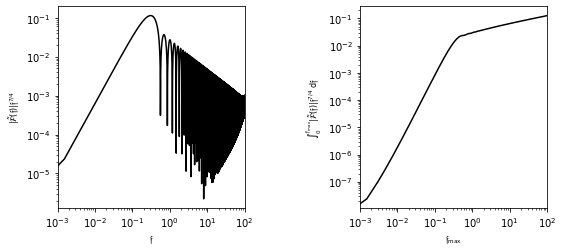

In [4]:
f_max, df = 100, 1e-3
f, P_F = hertz_theory('calculate', f_max, df)

integrand = np.sqrt(P_F) * f**1.75
integral = np.cumsum(integrand) * df


fig = plt.figure(figsize=[8, 4])
ax_integrand = fig.add_axes([0.125, 0.25, 0.325, 0.7],
                            xscale='log', xlim=[df, f_max],
                            yscale='log')
ax_integrand.loglog(f, integrand, 'k')
ax_integrand.set_xlabel(r'$\mathfrak{f}$', fontsize=8)
ax_integrand.set_ylabel(r'$|\tilde{\mathcal{F}}(\mathfrak{f})|\mathfrak{f}^{7/4}$', fontsize=8)
ax_integral = fig.add_axes([0.65, 0.25, 0.325, 0.7],
                            xscale='log', xlim=[df, f_max],
                            yscale='log')
ax_integral.loglog(f, integral, 'k')
ax_integral.set_xlabel(r'$\mathfrak{f}_\max$', fontsize=8)
ax_integral.set_ylabel(r'$\int_0^{\mathfrak{f}_\max}|\tilde{\mathcal{F}}(\mathfrak{f})|$'
                       r'$\mathfrak{f}^{7/4}$ d$\mathfrak{f}$', fontsize=8)
plt.show()

## References:

* Bachelet (2018). Étude expérimentale des émissions acoustiques générées par les écoulements granulaires. Géophysique [physics.geo-ph]. Institut de Physique du Globe de Paris, 2018.
* Bertrand, J. (1878). Sur l’homogénéité dans les formules de physique. Comptes rendus hebdomadaires des séances de l’Académie des sciences, 86 (15), 916–920.
* Buckingham, E. (1914). On physically similar systems; illustrations of the use of dimensional equations. Physical Review , 4 (4), 345–376
* Hertz, H. R. (1881). Über die berührung fester elastischer körper. Journal für die reine und angewandte Mathematik, 92, 156-171
